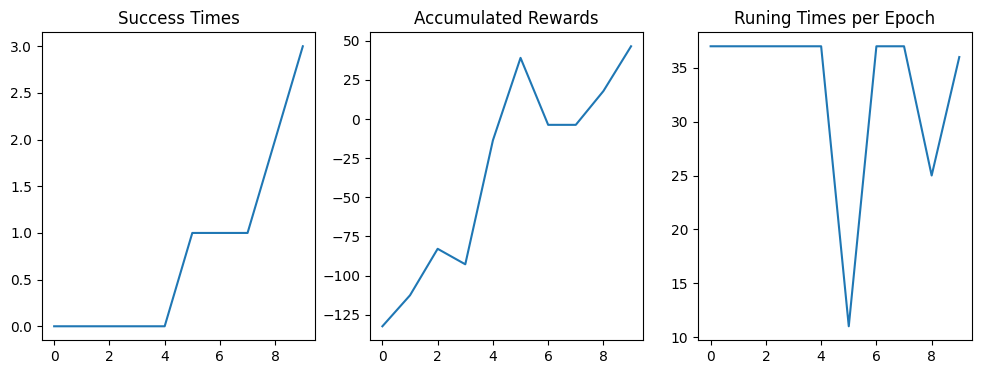

In [18]:
# 导入相关包 
import os
import random
import numpy as np
from Maze import Maze
from Runner import Runner
from QRobot import QRobot
import matplotlib.pyplot as plt

"""  Qlearning 算法相关参数： """

epoch = 10  # 训练轮数
epsilon0 = 0.5  # 初始探索概率
alpha = 0.5  # 公式中的 ⍺
gamma = 0.9  # 公式中的 γ
maze_size = 5  # 迷宫size

""" 使用 QLearning 算法训练过程 """

g = Maze(maze_size=maze_size)
r = QRobot(g, alpha=alpha, epsilon0=epsilon0, gamma=gamma)

runner = Runner(r)
runner.run_training(epoch, training_per_epoch=int(maze_size * maze_size * 1.5))
runner.plot_results() # 输出训练结果，可根据该结果对您的机器人进行分析。



接下来是搜索算法

In [20]:
import os
import random
import numpy as np
from Maze import Maze
from Runner import Runner
from QRobot import QRobot
import matplotlib.pyplot as plt

path = []
move_map = {
    'u': (-1, 0),  # up
    'r': (0, +1),  # right
    'd': (+1, 0),  # down
    'l': (0, -1),  # left
}
is_visit_m=[]
def my_search(maze, location=None):
    """
    任选深度优先搜索算法、最佳优先搜索（A*)算法实现其中一种
    :param maze: 迷宫对象
    :param location:当前机器人的位置 一个二元组 代表横纵坐标
    :return :到达目标点的路径 如：["u","u","r",...]
    """
    global is_visit_m, path  # 声明要使用的全局变量
    if location == None :
        location = maze.sense_robot()
        h, w, _ = maze.maze_data.shape
        is_visit_m = np.zeros((h, w), dtype=np.int)

    is_visit_m[location] = 1
    can_move = maze.can_move_actions(location)
    if location == maze.destination:
        return path
    for move in can_move: #move是动作
        new_location = tuple(location[i] + move_map[move][i] for i in range(2))
        print(move,new_location)
        if is_visit_m[new_location] == 0:
            path.append(move)
            result = my_search(maze, new_location)  # 递归调用并接收返回值
            if result is not None:
                return result

    is_visit_m[location] = 0
    path.pop()



In [21]:
current_location = None  # 全局变量，用于存储当前位置
maze = Maze(maze_size=10) # 从文件生成迷宫
path_2 = my_search(maze)
print("搜索出的路径：", path_2)

for action in path_2:
    maze.move_robot(action)


if maze.sense_robot() == maze.destination:
    print("恭喜你，到达了目标点")

r (0, 1)
r (0, 2)
r (0, 3)
r (0, 4)
r (0, 5)
r (0, 6)
r (0, 7)
r (0, 8)
r (0, 9)
l (0, 8)
l (0, 7)
d (1, 7)
u (0, 7)
d (2, 7)
u (1, 7)
l (0, 6)
l (0, 5)
l (0, 4)
d (1, 4)
u (0, 4)
r (1, 5)
r (1, 6)
l (1, 5)
l (1, 4)
d (2, 4)
u (1, 4)
r (2, 5)
d (3, 5)
u (2, 5)
r (3, 6)
u (2, 6)
d (3, 6)
r (3, 7)
r (3, 8)
u (2, 8)
u (1, 8)
r (1, 9)
l (1, 8)
d (2, 8)
r (2, 9)
l (2, 8)
d (3, 8)
r (3, 9)
l (3, 8)
l (3, 7)
d (4, 7)
u (3, 7)
r (4, 8)
r (4, 9)
l (4, 8)
l (4, 7)
d (5, 7)
u (4, 7)
r (5, 8)
r (5, 9)
d (6, 9)
u (5, 9)
d (7, 9)
u (6, 9)
l (5, 8)
d (6, 8)
u (5, 8)
d (7, 8)
u (6, 8)
l (5, 7)
d (6, 7)
u (5, 7)
l (6, 6)
r (6, 7)
l (4, 6)
r (4, 7)
d (5, 6)
u (4, 6)
l (3, 6)
l (3, 5)
l (2, 4)
d (3, 4)
u (2, 4)
d (4, 4)
u (3, 4)
d (5, 4)
u (4, 4)
d (6, 4)
u (5, 4)
r (6, 5)
u (5, 5)
u (4, 5)
d (5, 5)
d (6, 5)
l (6, 4)
d (7, 4)
u (6, 4)
r (7, 5)
r (7, 6)
d (8, 6)
u (7, 6)
r (8, 7)
u (7, 7)
d (8, 7)
l (8, 6)
d (9, 6)
u (8, 6)
r (9, 7)
r (9, 8)
u (8, 8)
r (8, 9)
l (8, 8)
d (9, 8)
r (9, 9)
搜索出的路径： ['r', 'r', 

C:\Windows\Temp\ipykernel_9176\2110063785.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  is_visit_m = np.zeros((h, w), dtype=np.int)
